# 1.) Pull in Data and Convert ot Monthly

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]
df.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097592
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [31]:
# difference in stock price
df['Diff'] = df['Adj Close'].diff().shift(-1)

# Target
df['Target'] = np.sign(df['Diff'])
df['Premium'] = .08*df['Adj Close']

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [32]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30"].copy()


In [33]:
# fit a logistic regression model
logreg = LogisticRegression()

logreg.fit(X, y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [35]:
y_pred = logreg.predict(X)

In [36]:
df['Predictions']= y_pred

In [37]:
df['Profits'] = 0.

In [38]:
# True Positive
df.loc[(df['Target']==1) & (df['Predictions']==1),'Profits' ] = df['Premium']

# False Positive
df.loc[(df['Target']==-1) & (df['Predictions']==1),'Profits' ] = (100*df['Diff'])+df['Premium']

# 5.) Plot profits over time

[]

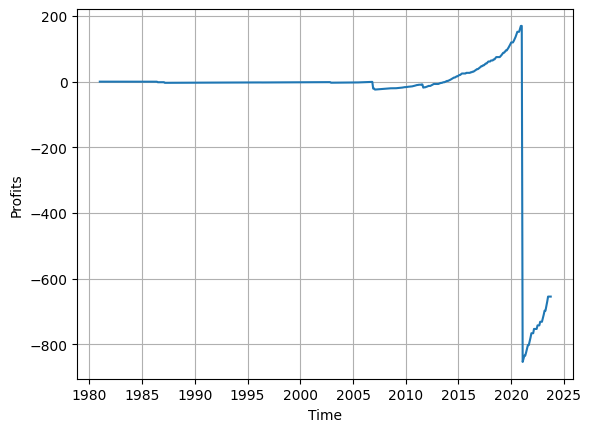

In [39]:
plt.plot(np.cumsum(df['Profits']))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Profits')
plt.plot()

# 5.5) short write up about how you see your skills valuable to PJ and/or Philip Liu.

Data Analysis and Econometrics:
1. Conduct time-series analysis to forecast cryptocurrency prices and volatility.
2. Use panel data to study the behavior of users across different blockchain platforms.
3. Apply machine learning algorithms for predictive modeling and trading strategy development.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.